## MNIST Classification with DNN: Regularization & Learning Rate Scheduling

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Loading the dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = (
    tf.keras.datasets.mnist.load_data()
)

## Preprocessing the dataset

In [6]:
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

## Model compiling and fitting functions

In [15]:
def model_creation(model):
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [26]:
def fit_model(model, train_images, train_labels, test_images, test_labels):
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

    history = model.fit(train_images, train_labels,
                        validation_data=(test_images, test_labels),
                        epochs=20, batch_size=128,
                        callbacks=[early_stop, lr_schedule])
    return history

## Model creation

In [28]:
model_1 = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(784,),
                     kernel_regularizer=regularizers.l1(1e-5)),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l1(1e-5)),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

In [30]:
model_2 = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(784,),
                     kernel_regularizer=regularizers.l2(1e-5)),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-5)),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

In [31]:
model_3 = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(784,),
                    kernel_regularizer=regularizers.l1(1e-5)),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-5)),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

In [32]:
model_4 = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(784,),
                     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5)),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-5)),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

## Model Training

In [33]:
model_creation(model_1)
history_1 = fit_model(model_1, train_images, train_labels, test_images, test_labels)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4850 - loss: 1.7049 - val_accuracy: 0.8533 - val_loss: 0.6706 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8446 - loss: 0.6899 - val_accuracy: 0.8960 - val_loss: 0.5399 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8800 - loss: 0.5833 - val_accuracy: 0.9076 - val_loss: 0.4912 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8955 - loss: 0.5309 - val_accuracy: 0.9168 - val_loss: 0.4541 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9099 - loss: 0.4885 - val_accuracy: 0.9287 - val_loss: 0.4140 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9179 - loss: 0.4512 - val_accuracy: 0.9370 - val_loss: 0.3865 - learning_rate: 0.0010
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9255 - loss: 0.4242 - 

In [34]:
model_creation(model_2)
history_2 = fit_model(model_2, train_images, train_labels, test_images, test_labels)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5373 - loss: 1.4923 - val_accuracy: 0.8746 - val_loss: 0.4642 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8704 - loss: 0.4751 - val_accuracy: 0.9110 - val_loss: 0.3595 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8992 - loss: 0.3947 - val_accuracy: 0.9253 - val_loss: 0.3120 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9143 - loss: 0.3466 - val_accuracy: 0.9341 - val_loss: 0.2797 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9268 - loss: 0.3077 - val_accuracy: 0.9431 - val_loss: 0.2514 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9363 - loss: 0.2818 - val_accuracy: 0.9510 - val_loss: 0.2302 - learning_rate: 0.0010
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9441 - loss: 0.2560 - 

In [35]:
model_creation(model_3)
history_3 = fit_model(model_3, train_images, train_labels, test_images, test_labels)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4784 - loss: 1.6332 - val_accuracy: 0.8667 - val_loss: 0.5760 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8594 - loss: 0.6033 - val_accuracy: 0.8997 - val_loss: 0.4685 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8900 - loss: 0.5083 - val_accuracy: 0.9130 - val_loss: 0.4145 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9038 - loss: 0.4538 - val_accuracy: 0.9276 - val_loss: 0.3794 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9168 - loss: 0.4159 - val_accuracy: 0.9348 - val_loss: 0.3456 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9262 - loss: 0.3796 - val_accuracy: 0.9452 - val_loss: 0.3148 - learning_rate: 0.0010
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9344 - loss: 0.3519 - 

In [36]:
model_creation(model_4)
history_4 = fit_model(model_4, train_images, train_labels, test_images, test_labels)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4803 - loss: 1.6998 - val_accuracy: 0.8692 - val_loss: 0.6657 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8542 - loss: 0.6901 - val_accuracy: 0.9004 - val_loss: 0.5562 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8820 - loss: 0.6066 - val_accuracy: 0.9122 - val_loss: 0.5086 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8960 - loss: 0.5582 - val_accuracy: 0.9194 - val_loss: 0.4730 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9093 - loss: 0.5161 - val_accuracy: 0.9308 - val_loss: 0.4457 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9163 - loss: 0.4841 - val_accuracy: 0.9322 - val_loss: 0.4222 - learning_rate: 0.0010
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9239 - loss: 0.4537 - 

## Evaluation of the models and Analysis

In [37]:
# Evaluate all 4 models
test_loss_1, test_acc_1 = model_1.evaluate(test_images, test_labels, verbose=0)
test_loss_2, test_acc_2 = model_2.evaluate(test_images, test_labels, verbose=0)
test_loss_3, test_acc_3 = model_3.evaluate(test_images, test_labels, verbose=0)
test_loss_4, test_acc_4 = model_4.evaluate(test_images, test_labels, verbose=0)

print(f"Model 1 - Test Accuracy: {test_acc_1:.4f}, Test Loss: {test_loss_1:.4f}")
print(f"Model 2 - Test Accuracy: {test_acc_2:.4f}, Test Loss: {test_loss_2:.4f}")
print(f"Model 3 - Test Accuracy: {test_acc_3:.4f}, Test Loss: {test_loss_3:.4f}")
print(f"Model 4 - Test Accuracy: {test_acc_4:.4f}, Test Loss: {test_loss_4:.4f}")

Model 1 - Test Accuracy: 0.9737, Test Loss: 0.2271
Model 2 - Test Accuracy: 0.9737, Test Loss: 0.1494
Model 3 - Test Accuracy: 0.9730, Test Loss: 0.1982
Model 4 - Test Accuracy: 0.9687, Test Loss: 0.2519


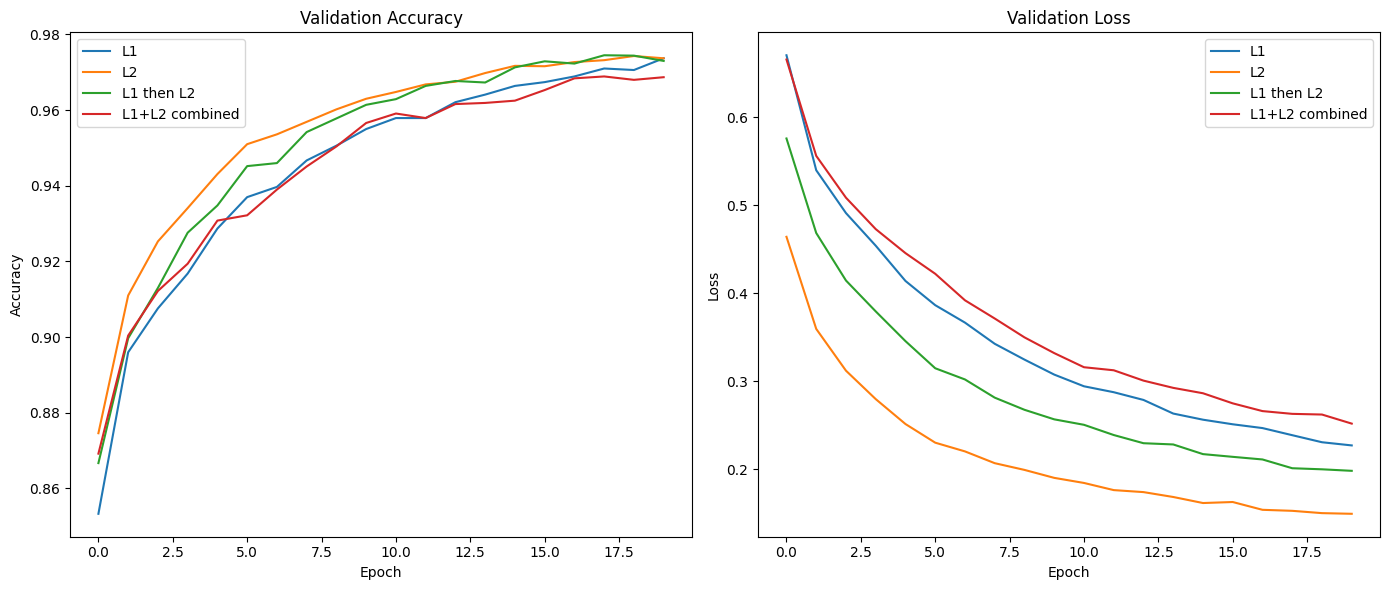

In [40]:
def plot_histories(histories, names):
    plt.figure(figsize=(14, 6))

    # Accuracy
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history['val_accuracy'], label=f'{name}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history['val_loss'], label=f'{name}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_histories(
    [history_1, history_2, history_3, history_4],
    ['L1', 'L2', 'L1 then L2', 'L1+L2 combined']
)


# Performance Analysis

| Metric                    | **Model 1** (L1)  | **Model 2** (L2)              | **Model 3** (L1 then L2)      | **Model 4** (L1+L2 combined)  |
|---------------------------|------------------|-------------------------------|--------------------------------|-------------------------------|
| **Regularization**        | L1               | L2                            | L1 in Dense1, L2 in Dense2     | L1 & L2 in all Dense layers   |
| **Final Training Loss**   | 26.21 %          | 15.58 %                       | 23.02 %                        | 28.82 %                       |
| **Final Validation Loss** | 22.71 %          | 14.94 %                       | 19.82 %                        | 25.19 %                       |
| **Test Accuracy**         | 97.37 %          | 97.37 %                       | 97.30 %                        | 96.87 %                       |
| **Test Loss**             |  22.71 %         | 14.94 %                       | 19.82 %                        | 25.19 %                       |

Model 1 (L1 Regularization)

Uses L1 regularization in all dense layers.

- The training loss is 26.21%, and the validation loss is 22.71%, showing some degree of overfitting.

- The test accuracy is 97.37%, which is quite good, but not the best among all models.

- L1 regularization encouraged sparsity in the weights, but may have caused underfitting in some parts, evident from higher training loss.

- The gap between training and validation loss suggests the model could not generalize as well as models with L2 or combined regularizatio

Model 2 (L2 Regularization)

Applies L2 regularization throughout the network.

- The training loss is 15.58%, significantly lower than Model 1, and validation loss is 14.94%, indicating better fit and generalization.

- Achieved 97.37% test accuracy — matching Model 1 in accuracy but with more stable loss behavior.

- L2 regularization penalized large weights and helped the model avoid overfitting.

- The close match between training and validation loss suggests a well-balanced model.

 Model 3 (L1 then L2)
 
Applies L1 regularization on the first dense layer and L2 on the second.

- The training loss is 23.02% and validation loss is 19.82% — a middle ground between Models 1 and 2.

- Test accuracy is 97.30%, slightly lower than the others.

- This mixed strategy didn’t offer clear advantages; possibly the inconsistent regularization led to less optimal learning dynamics.

- Model is reasonably well regularized but didn't outperform pure L2.

 Model 4 (L1+L2 Combined)
 
Uses combined L1 and L2 regularization (l1_l2) in all dense layers.

- Highest training loss (28.82%) and validation loss (25.19%) among all models.

- Achieved 96.87% test accuracy — the lowest of all.

- Heavier regularization likely caused underfitting, as the model struggled to minimize loss.

- While generalization was acceptable, it came at the cost of higher loss and lower accuracy. This shows that too much regularization can degrade performance